In [91]:
import pandas as pd
import nltk

In [92]:
df=pd.read_csv('Dataset/Spam_SMS.csv')
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


([<matplotlib.patches.Wedge at 0x1b62a381810>,
 [Text(-1.0039394445155985, 0.4495615550130057, 'spam'),
  Text(1.003939423470102, -0.449561602010803, 'ham')])

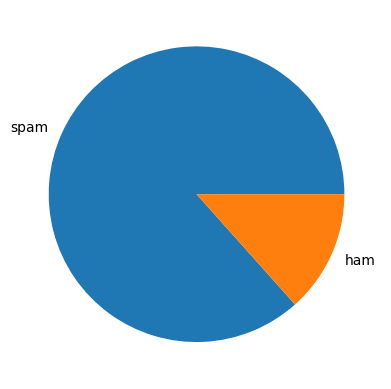

In [93]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.pie(df['Class'].value_counts(),labels=['spam','ham'])

In [94]:
df['length']=df['Message'].apply(len)

(array([3.680e+03, 1.758e+03, 7.600e+01, 3.700e+01, 1.400e+01, 3.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  2. ,  92.8, 183.6, 274.4, 365.2, 456. , 546.8, 637.6, 728.4,
        819.2, 910. ]),
 <BarContainer object of 10 artists>)

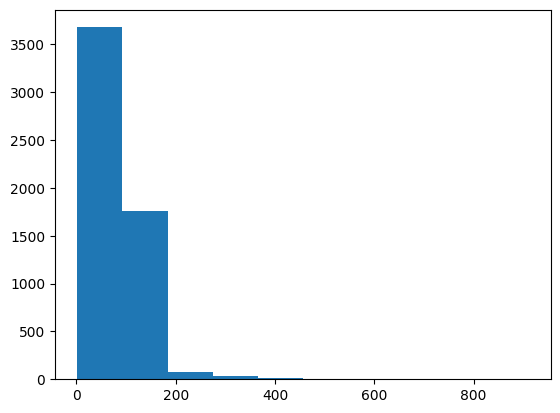

In [95]:
plt.hist(df['length'])

In [96]:
def find_cnt(text):
    text=text.split()
    return len(text)
df['word_cnt']=df['Message'].apply(find_cnt)

(array([3.575e+03, 1.797e+03, 1.400e+02, 3.500e+01, 1.500e+01, 6.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([  1.,  18.,  35.,  52.,  69.,  86., 103., 120., 137., 154., 171.]),
 <BarContainer object of 10 artists>)

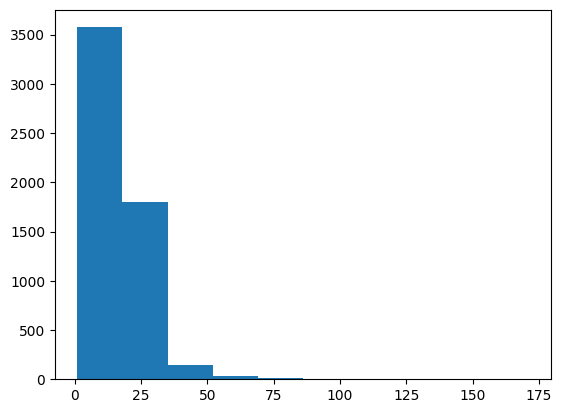

In [97]:
plt.hist(df['word_cnt'])

In [98]:
df.head()

,Class,Message,length,word_cnt
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


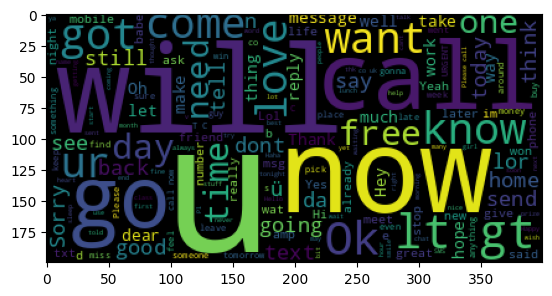

In [99]:
#Before Preproc
from wordcloud import WordCloud
wc=WordCloud().generate(
    ' '.join(df['Message']))
plt.imshow(wc)
plt.show()

E:\Xai_Req_Setup\.jupyter_env\temp\ipykernel_16956\7658181.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


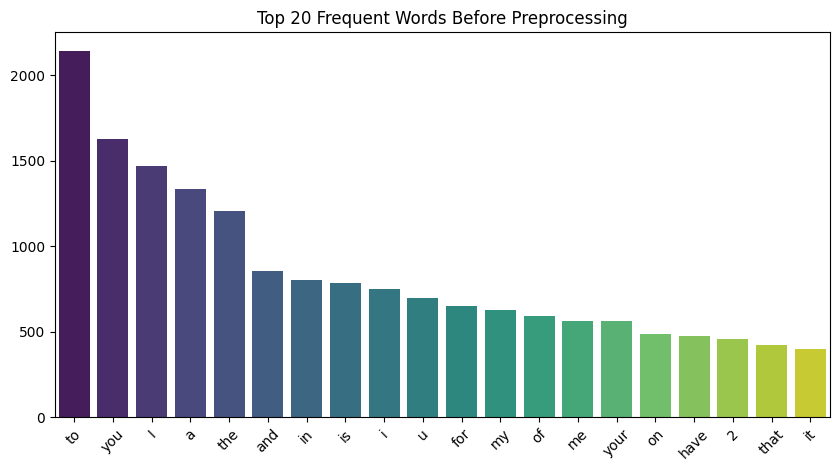

In [100]:
from collections import Counter
import seaborn as sns
words = ' '.join(df['Message']).split()
word_freq = Counter(words).most_common(20)

words, counts = zip(*word_freq)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 20 Frequent Words Before Preprocessing")
plt.xticks(rotation=45)
plt.show()

In [101]:
import string
from nltk.stem import PorterStemmer,WordNetLemmatizer

stemmer=PorterStemmer()
lemma=WordNetLemmatizer()
def preprocess(text):
    text=text.lower()
    text=text.translate(str.maketrans('','',string.punctuation))
    tokens=text.split()
    tokens = [t for t in tokens if len(t) > 2]
    tokens=[stemmer.stem(lemma.lemmatize(t)) for t in tokens]
    return ' '.join(tokens)

df['Message']=df['Message'].apply(preprocess)

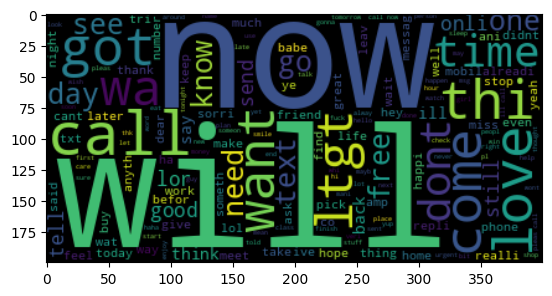

In [102]:
#After Preprocessing
wc=WordCloud().generate(' '.join(df['Message']))
plt.imshow(wc, interpolation='bilinear')

E:\Xai_Req_Setup\.jupyter_env\temp\ipykernel_16956\4127273593.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


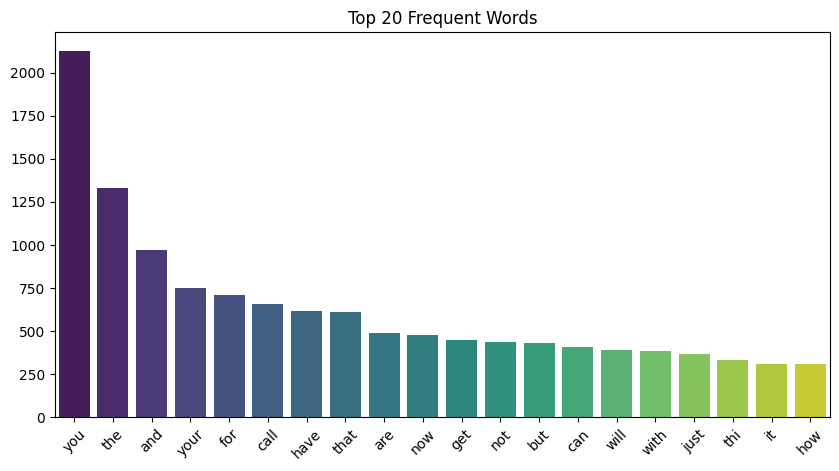

In [105]:
from collections import Counter
import seaborn as sns
words = ' '.join(df['Message']).split()
word_freq = Counter(words).most_common(20)

words, counts = zip(*word_freq)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 20 Frequent Words")
plt.xticks(rotation=45)
plt.show()

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Your CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'cats_dogs',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'cats_dogs',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 107 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [68]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.fit(train_generator, validation_data=val_generator, epochs=5)


In [70]:
# Get one image
# sample_image, label = next(val_generator)
# img = sample_image[0]  # Shape: (150, 150, 3)
# img_batch = np.expand_dims(img, axis=0)
from tensorflow.keras.preprocessing.image import load_img,img_to_array
img=load_img('Dataset/CAT.jpg',target_size=(150,150))
img_arr=img_to_array(img)/255.0
img_batch=np.expand_dims(img_arr,axis=0)

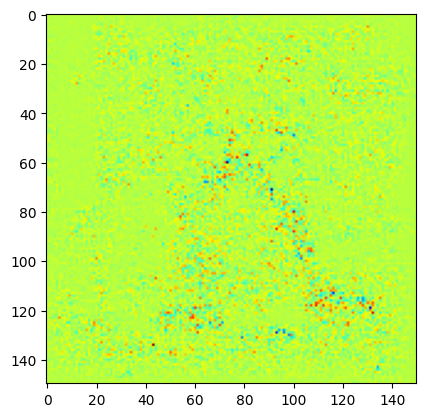

In [75]:
img_tensor=tf.convert_to_tensor(img_batch)
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    pred=model(img_tensor)
    loss=pred[0]

grads=tape.gradient(loss,img_tensor)[0].numpy()
relevance=grads*img_arr

lrp_map=np.sum(relevance,axis=-1)
plt.imshow(lrp_map,cmap='jet')

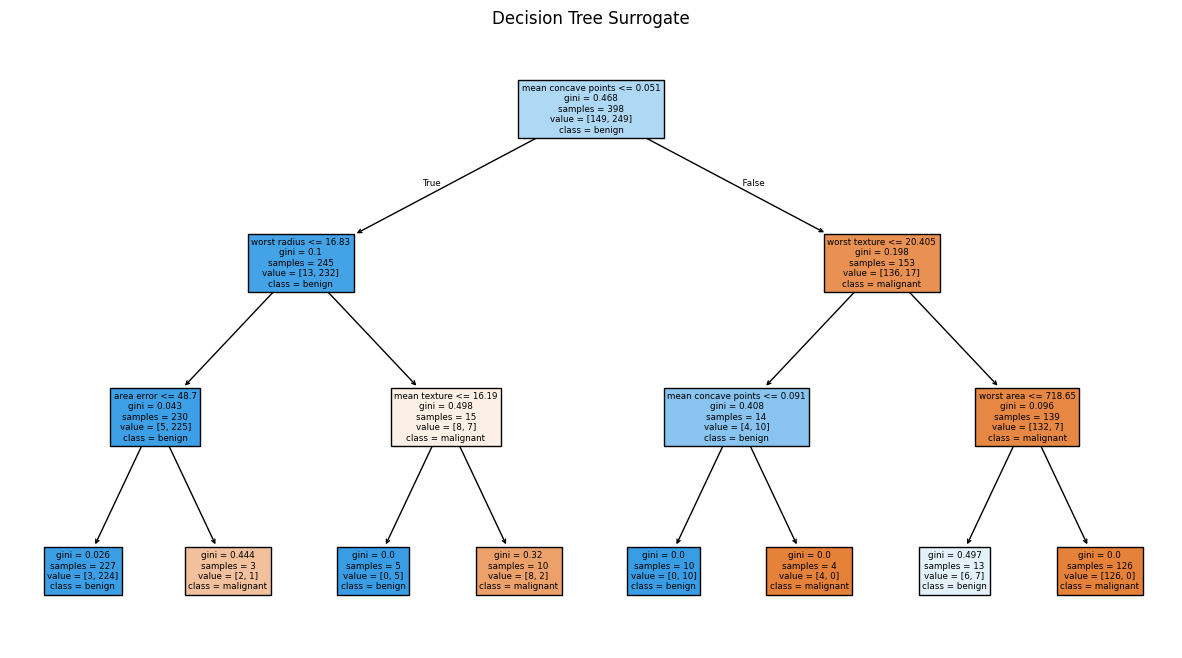

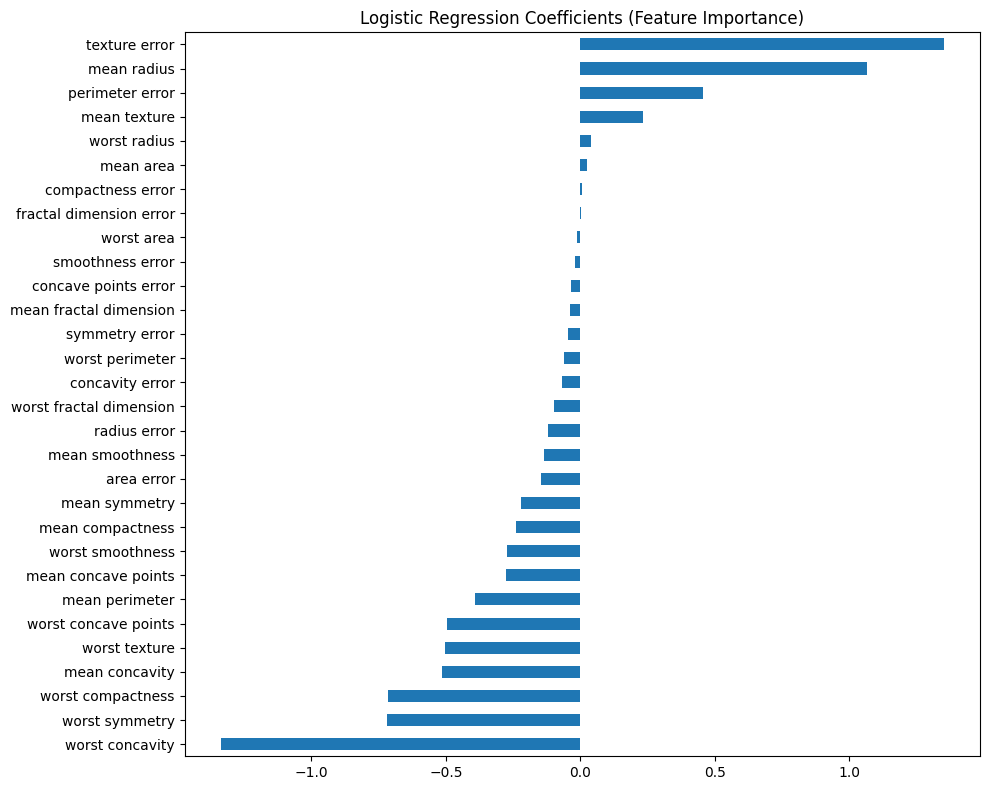

Nearest Neighbors of Test Sample Index 0:
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
518        12.88         18.22           84.45      493.1          0.12180   
135        12.77         22.47           81.72      506.3          0.09055   
229        12.83         22.33           85.26      503.2          0.10880   
200        12.23         19.56           78.54      461.0          0.09586   
496        12.65         18.17           82.69      485.6          0.10760   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
518           0.16610         0.04825              0.05303         0.1709   
135           0.05761         0.04711              0.02704         0.1585   
229           0.17990         0.16950              0.06861         0.2123   
200           0.08087         0.04187              0.04107         0.1979   
496           0.13340         0.08017              0.05074         0.1641   

     mean fractal dimensio

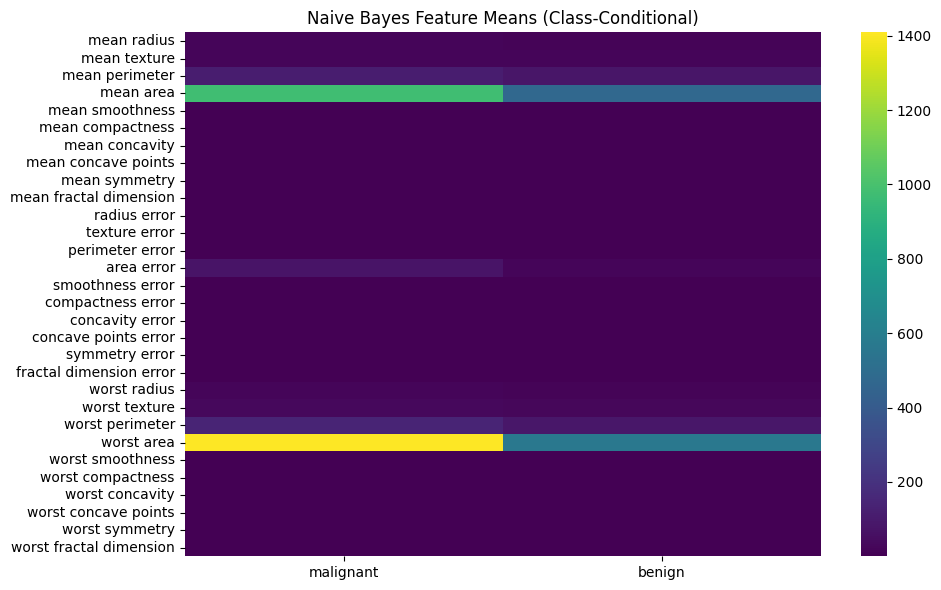

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Train Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# 2. Train Logistic Regression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

# 3. Train K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 4. Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# =====================================
# 🧠 Visualization
# =====================================

# A. Decision Tree Plot
plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.title("Decision Tree Surrogate")
plt.show()

# B. Logistic Regression Coefficients
coeffs = pd.Series(lr.coef_[0], index=X.columns)
plt.figure(figsize=(10, 8))
coeffs.sort_values().plot(kind='barh')
plt.title("Logistic Regression Coefficients (Feature Importance)")
plt.tight_layout()
plt.show()

# C. KNN - Nearest Neighbors for Sample Instance
sample_idx = 0
X_sample = X_test.iloc[[sample_idx]]
nbrs = NearestNeighbors(n_neighbors=5).fit(X_train)
distances, indices = nbrs.kneighbors(X_sample)

print(f"Nearest Neighbors of Test Sample Index {sample_idx}:")
print(X_train.iloc[indices[0]])

# D. Naive Bayes Class-Conditional Means (Theta)
feature_likelihoods = pd.DataFrame(nb.theta_, columns=X.columns, index=["malignant", "benign"])
plt.figure(figsize=(10, 6))
sns.heatmap(feature_likelihoods.T, cmap="viridis")
plt.title("Naive Bayes Feature Means (Class-Conditional)")
plt.tight_layout()
plt.show()


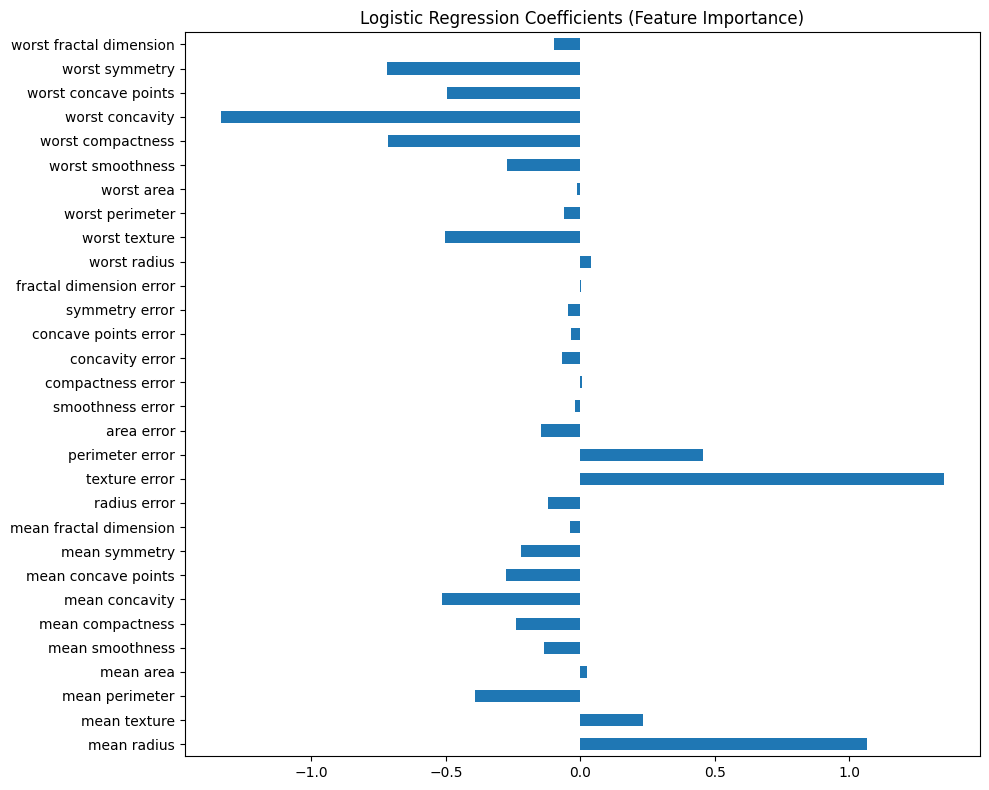

In [77]:
coeffs = pd.Series(lr.coef_[0], index=X.columns)
plt.figure(figsize=(10, 8))
coeffs.plot(kind='barh')
plt.title("Logistic Regression Coefficients (Feature Importance)")
plt.tight_layout()
plt.show()